In [1]:
from google.colab import drive
import os

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
os.chdir('drive/MyDrive/paperBuild/Compressor')

In [4]:
!ls

 compressorWork.docx
'Copy of jetStall.ipynb'
 description.docx
'Draft Manuscript Aung Schoen and Li June 2019.pdf'
 finalADVANCEDAIGolam.pptx
'J-34 Poster.pdf'
 January2020StallData.rar
 jetImages.docx
 jetStall.ipynb
 point8_3.dat
 point8_4_stall.dat
 Proposal.docx
 Proposal_Golam.pdf
'Research Description December 2015.docx'


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
raw=pd.read_fwf('point8_4_stall.dat', header=None)

In [7]:
raw.head(5)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.208282,0.381927,0.180817,4.990387,-0.251770,-0.007019,-0.156097,0.286255,0.173950,-0.298767,...,-0.639801,-0.495911,-0.025787,0.162354,0.008087,0.136871,-1.141663,-0.253601,-0.008545,0.419769
1,0.092316,0.250092,0.167236,4.989929,-0.210419,-0.021515,-0.361176,0.058136,0.122375,-0.196075,...,-0.551300,-0.434418,-0.003967,0.026855,0.002594,0.089722,-0.884705,-0.219879,0.043182,0.362701
2,-0.049744,0.226440,0.177460,4.992676,-0.191650,-0.154419,-0.568848,0.031891,0.114441,-0.101318,...,-0.472565,-0.402222,-0.124207,-0.213318,-0.029602,0.113678,-0.735779,-0.188904,0.051270,0.224915
3,-0.101624,0.260010,0.176392,4.990845,-0.170593,-0.287781,-0.703735,-0.102692,0.218201,-0.003662,...,-0.413208,-0.377350,-0.399475,-0.504608,-0.082245,0.122986,-0.541077,-0.166473,-0.105133,-0.101624
4,-0.124207,0.270081,0.180969,4.989014,-0.151062,-0.407867,-0.756989,0.062561,0.299988,0.071869,...,-0.346680,-0.339661,-0.619202,-0.793457,-0.115662,0.084534,-0.424652,-0.143433,-0.386658,-0.358734


In [8]:
raw.iloc[:,9]

0        -0.298767
1        -0.196075
2        -0.101318
3        -0.003662
4         0.071869
            ...   
184995   -0.307312
184996   -0.388184
184997   -0.477295
184998   -0.520020
184999   -0.536957
Name: 9, Length: 185000, dtype: float64

In [9]:
raw.index.values

array([     0,      1,      2, ..., 184997, 184998, 184999])

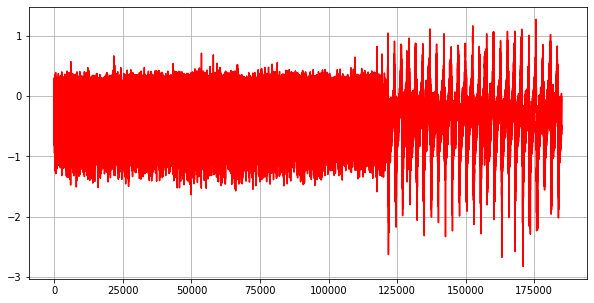

In [10]:
plt.figure(figsize=(10,5))
plt.plot(raw.index.values, raw.iloc[:,9], color='red')
plt.grid()

In [11]:
channels=[[4,5,6,7,8],[14,13,12,11,15],[18,19,20,21,22],[24,25,26,0,1]]
pressurecoeff=[[ 1580.1, 1595, 1457.4, 1450.1, 1414.1],[1204.9, 1048.4, 1185.7, 1191.5, 1201.4],[1194.7, 1201.2, 1194.5, 1851.9, 1773.9],[1198, 1203.4, 1199.7, 1299.9, 2077.2]]
hall=[3]
threshold=2.5 # 0~5

In [12]:
hall_logic=raw.iloc[:,hall]
hall_logic.values

array([[4.990387],
       [4.989929],
       [4.992676],
       ...,
       [4.988098],
       [4.992523],
       [4.990234]])

In [13]:
len(hall_logic.values)

185000

In [14]:
def hall_reform(hall_logic, threshold):
  data=hall_logic.values
  for i in range(len(data)):
    data[i] = 0 if data[i]>threshold else 1

  return data

hall_logic=hall_reform(hall_logic, threshold)

In [15]:
hall_logic

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [25]:
channels

[[4, 5, 6, 7, 8],
 [14, 13, 12, 11, 15],
 [18, 19, 20, 21, 22],
 [24, 25, 26, 0, 1]]

In [23]:
data=raw.iloc[:,channels[0][:]]

In [24]:
data

,4,5,6,7,8
0,-0.251770,-0.007019,-0.156097,0.286255,0.173950
1,-0.210419,-0.021515,-0.361176,0.058136,0.122375
2,-0.191650,-0.154419,-0.568848,0.031891,0.114441
3,-0.170593,-0.287781,-0.703735,-0.102692,0.218201
4,-0.151062,-0.407867,-0.756989,0.062561,0.299988
...,...,...,...,...,...
184995,-0.263977,-0.142059,0.025024,0.354919,0.134277
184996,-0.281830,-0.122833,0.044708,0.352478,0.223846
184997,-0.292358,-0.090942,0.046234,0.383759,0.297089
184998,-0.279541,-0.050354,0.053711,0.372620,0.324860


In [26]:
data.iloc[0,2]

-0.156097

In [27]:
# 2400 rpm 50KHz Blade Passage 60: 20 samples per passage per revolution

In [28]:
hall_flag=hall_logic[1:]-hall_logic[:-1]

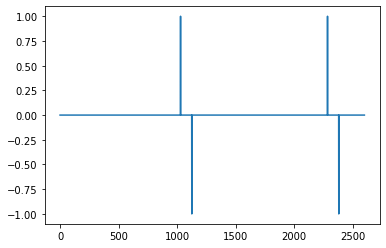

In [29]:
plt.plot(hall_flag[:2600]) # 60 passages

In [30]:
sum(hall_flag==1)

array([147])

In [31]:
def indices_work(hall_flag):
  temp=np.array([])
  for i in range(len(hall_flag)):
    if hall_flag[i]==1:
      temp=np.append(temp, i+1)
  
  return temp

indices=indices_work(hall_flag)
indices=indices.astype(int)


In [32]:
len(indices)


147

In [33]:
indices

array([  1030,   2285,   3539,   4793,   6047,   7301,   8555,   9809,
        11064,  12318,  13572,  14826,  16080,  17334,  18588,  19842,
        21096,  22350,  23605,  24859,  26113,  27367,  28621,  29875,
        31129,  32383,  33637,  34891,  36145,  37399,  38653,  39907,
        41162,  42416,  43670,  44924,  46178,  47432,  48686,  49940,
        51194,  52448,  53702,  54956,  56211,  57465,  58719,  59973,
        61227,  62481,  63735,  64989,  66243,  67497,  68751,  70005,
        71259,  72513,  73767,  75021,  76275,  77529,  78783,  80036,
        81290,  82544,  83798,  85052,  86306,  87560,  88814,  90067,
        91321,  92575,  93829,  95083,  96337,  97590,  98844, 100098,
       101352, 102605, 103859, 105113, 106366, 107620, 108874, 110127,
       111381, 112635, 113888, 115142, 116396, 117649, 118903, 120157,
       121410, 122664, 123917, 125170, 126423, 127675, 128927, 130179,
       131431, 132682, 133934, 135185, 136436, 137687, 138938, 140188,
      

In [36]:
len(channels[0][:])

5

In [42]:
pressurecoeff[0][:]

[1580.1, 1595, 1457.4, 1450.1, 1414.1]

In [87]:
np.arange(0,datapts,2*len(channels))

array([ 0,  8, 16, 24, 32, 40, 48, 56])

In [88]:
samples=20
datapts=64
batch=np.arange(0,datapts,2*len(channels))
dp=np.zeros([datapts,len(indices), samples, len(channels[0][:])])

for p in batch:
  dataR=np.zeros([len(indices), samples, len(channels[0][:])]) # Revolution, time series, sensors
  dataL=np.zeros([len(indices), samples, len(channels[0][:])])

  n=0
  coefficients=pressurecoeff[0][:]
  for m in indices:
    dataR[n]=raw.iloc[m:m+samples, channels[0][:]].values # any coefficient multiplication should be done here
    dataR[n]=np.multiply(dataR[n], coefficients)
    dataL[n]=raw.iloc[m-samples:m, channels[0][:]].values # any coefficient multiplication should be done here
    dataL[n]=np.multiply(dataL[n], coefficients)
    n=n+1

  #chord 0
  dp[p]=dataR
  dp[p+1]=dataL

  dataR=np.zeros([len(indices), samples, len(channels[1][:])]) # Revolution, time series, sensors
  dataL=np.zeros([len(indices), samples, len(channels[1][:])])

  n=0
  coefficients=pressurecoeff[1][:]
  for m in indices:
    dataR[n]=raw.iloc[m:m+samples, channels[1][:]].values # any coefficient multiplication should be done here
    dataR[n]=np.multiply(dataR[n], coefficients)
    dataL[n]=raw.iloc[m-samples:m, channels[1][:]].values # any coefficient multiplication should be done here
    dataL[n]=np.multiply(dataL[n], coefficients)
    n=n+1

  #chord 1
  dp[p+2]=dataR
  dp[p+3]=dataL

  dataR=np.zeros([len(indices), samples, len(channels[2][:])]) # Revolution, time series, sensors
  dataL=np.zeros([len(indices), samples, len(channels[2][:])])

  n=0
  coefficients=pressurecoeff[2][:]
  for m in indices:
    dataR[n]=raw.iloc[m:m+samples, channels[2][:]].values # any coefficient multiplication should be done here
    dataR[n]=np.multiply(dataR[n], coefficients)
    dataL[n]=raw.iloc[m-samples:m, channels[2][:]].values # any coefficient multiplication should be done here
    dataL[n]=np.multiply(dataL[n], coefficients)
    n=n+1

  #chord 2
  dp[p+4]=dataR
  dp[p+5]=dataL

  dataR=np.zeros([len(indices), samples, len(channels[3][:])]) # Revolution, time series, sensors
  dataL=np.zeros([len(indices), samples, len(channels[3][:])])

  n=0
  coefficients=pressurecoeff[3][:]
  for m in indices:
    dataR[n]=raw.iloc[m:m+samples, channels[3][:]].values # any coefficient multiplication should be done here
    dataR[n]=np.multiply(dataR[n], coefficients)
    dataL[n]=raw.iloc[m-samples:m, channels[3][:]].values # any coefficient multiplication should be done here
    dataL[n]=np.multiply(dataL[n], coefficients)
    n=n+1

  #chord 3
  dp[p+6]=dataR
  dp[p+7]=dataL

dataL.shape

(147, 20, 5)

In [89]:
dp.shape

(64, 147, 20, 5)

In [67]:
np.multiply([[1,2,3],[4,5,6]], [2,3,4])

array([[ 2,  6, 12],
       [ 8, 15, 24]])

In [91]:
dp[63]

array([[[ -269.081582 , -1279.310472 , -1000.7873406,   -20.8269978,
           541.359864 ],
        [ -316.42774  , -1246.8090448,  -957.9508524,   -35.1076992,
           503.6420664],
        [ -399.601286 , -1121.3931036,  -892.5995943,    16.2643488,
           482.7225852],
        ...,
        [ -314.416298 ,  -121.5590442,  -210.8844657,    74.380278 ,
           421.8668568],
        [ -268.167508 ,  -429.8641072,  -522.4525542,   -97.3898079,
           417.4299576],
        [ -263.232946 ,  -773.42518  ,  -857.2684293,   -75.7698711,
           418.3813152]],

       [[ -302.534534 , -1301.8958832, -1019.8253799,    34.512345 ,
           494.768268 ],
        [ -359.020234 , -1191.9051232,  -865.5067692,   123.1746243,
           555.3061848],
        [ -461.388136 , -1043.5367338,  -742.6730853,    56.9265207,
           625.0357116],
        ...,
        [ -343.847564 ,  -424.1720252,  -420.3052974,   -82.7113371,
           567.9833364],
        [ -314.416298 ,  -718.70

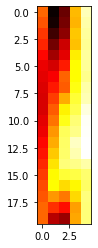

In [92]:
plt.imshow(dp[63][0], cmap='hot', interpolation='nearest', )
plt.show()

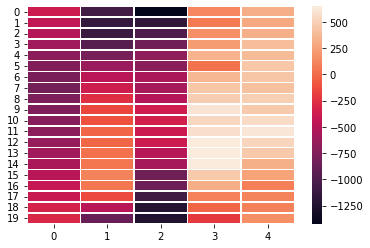

In [93]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt_

ax = sns.heatmap(dp[0][0], linewidth=0.5)
plt_.show()

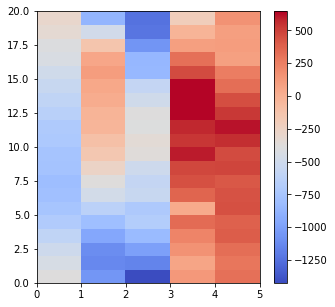

In [94]:
fig, ax = plt.subplots(figsize=(5,5))
pcm = ax.pcolormesh(dp[0][0], cmap='coolwarm')
pcm.set_clim(min(dp[0][0].reshape(-1)),max(dp[0][0].reshape(-1)))
fig.colorbar(pcm, ax=ax)
plt.show()

In [97]:
data_=dp[63]
data_[data_==0]=0.0000001

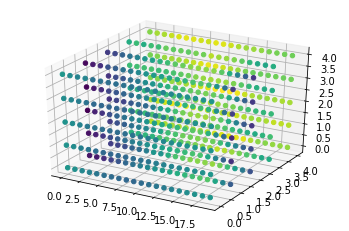

In [98]:
layers=5

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, x, y = data_[0:layers].nonzero()
ax.scatter(x, y, z, c=data_[0:layers].reshape(-1), alpha=1)
plt.show()

In [99]:
data_[0:layers].shape

(5, 20, 5)